In [647]:
import pandas as pd

#### 코로나

In [648]:
import numpy as np
covidDF = pd.read_excel('질병관리청_코로나19 확진자 발생현황(전수감시).xlsx', sheet_name='시도별 발생(17개시도+검역)')
covidDF.columns=['일자','계(명)','서울','부산','대구','인천','광주','대전','울산','세종','경기','강원','충북','충남','전북','전남','경북','경남','제주','검역']
covidDF.drop([0,1,2,3,4],inplace=True)  # 빈 행 및 인덱스용이었던 행 삭제
covidDF.replace('-',0,inplace=True) # '-' -> 0으로 대체
covidDF['일자'] = pd.to_datetime(covidDF['일자'])   # 날짜 전부 datatime으로 변동

covidDF.set_index('일자', inplace=True)     # 인덱스 일자 칼럼으로 변경
covidDF = covidDF.resample('M').sum()       # 날짜 인덱스 월별로 압축 및 합산
covidDF = covidDF.T
covidDF.columns=['20년 1월','20년 2월','20년 3월','20년 4월','20년 5월','20년 6월','20년 7월','20년 8월','20년 9월','20년 10월','20년 11월','20년 12월',
                 '21년 1월','21년 2월','21년 3월','21년 4월','21년 5월','21년 6월','21년 7월','21년 8월','21년 9월','21년 10월','21년 11월','21년 12월',
                 '22년 1월','22년 2월','22년 3월','22년 4월','22년 5월','22년 6월','22년 7월','22년 8월','22년 9월','22년 10월','22년 11월','22년 12월',
                 '23년 1월','23년 2월','23년 3월','23년 4월','23년 5월','23년 6월','23년 7월','23년 8월']

covid20DF = pd.concat([covidDF['20년 1월'],covidDF['20년 2월'],covidDF['20년 3월'],covidDF['20년 4월'],covidDF['20년 5월'],covidDF['20년 6월'],covidDF['20년 7월'],covidDF['20년 8월'],covidDF['20년 9월'],covidDF['20년 10월'],covidDF['20년 11월'],covidDF['20년 12월']], axis=1 ,keys=['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월'])

covid22DF = pd.concat([covidDF['22년 1월'],covidDF['22년 2월'],covidDF['22년 3월'],covidDF['22년 4월'],covidDF['22년 5월'],covidDF['22년 6월'],
                       covidDF['22년 7월'],covidDF['22년 8월'],covidDF['22년 9월'],covidDF['22년 10월'],
                       covidDF['22년 11월'],covidDF['22년 12월']],
                        axis=1 ,keys=['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월'])
covid21DF = pd.concat([covidDF['21년 1월'],covidDF['21년 2월'],covidDF['21년 3월'],covidDF['21년 4월'],covidDF['21년 5월'],
           covidDF['21년 6월'],covidDF['21년 7월'],covidDF['21년 8월'],covidDF['21년 9월'],covidDF['21년 10월'],
           covidDF['21년 11월'],covidDF['21년 12월']],
           axis=1 ,keys=['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월'])


total_covid = pd.concat([covid20DF.iloc[0],covid21DF.iloc[0],covid22DF.iloc[0]], axis=1, keys=['20년','21년','22년'])


C:\Users\kjy19\AppData\Local\Temp\ipykernel_20720\1546930178.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  covidDF.replace('-',0,inplace=True) # '-' -> 0으로 대체
C:\Users\kjy19\AppData\Local\Temp\ipykernel_20720\1546930178.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  covidDF = covidDF.resample('M').sum()       # 날짜 인덱스 월별로 압축 및 합산


#### 20년도 ~ 22년도 / 년간 범죄발생 3만건 이상의 특정 범죄 테이블

In [649]:
# 20년도
crime_year = pd.read_excel('범죄발생_월별.xlsx')
# 20년도 정리
y20_crime = pd.concat([crime_year['범죄별(1)'], crime_year['범죄별(2)'], crime_year['범죄별(3)'],crime_year['2020'],crime_year['2020.1'],crime_year['2020.2'],crime_year['2020.3'],
                       crime_year['2020.4'],crime_year['2020.5'],crime_year['2020.6'],crime_year['2020.7'],
                       crime_year['2020.8'],crime_year['2020.9'],crime_year['2020.10'],crime_year['2020.11'],
                       crime_year['2020.12']],  axis=1 ,keys=['법률 여부','범죄 카테고리','범죄명','소계','1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월',])
y20_crime.drop([0], inplace=True)
y20_total_crime = y20_crime.iloc[0] # 20년도 총 범죄 소계
y20_crime.replace('-',0,inplace=True)
# y20_crime
# 2020년도 가장 빈번햇던 범죄 추출 
y20_crime['소계'].describe()    # mean 19595 // 75% 5950 // max 670141
spec_y20_crime = y20_crime[(y20_crime['소계']>=30000) & ~(y20_crime['범죄명']=='소계')]
# spec_y20 = pd.DataFrame(index=)
# spec_y20 = spec_y20_crime[0].add(spec_y20_crime[1,2,3,4,5,6,7])
# spec_y20_crime
spec_y20_crime

# spec_y20_crime['범죄명']=='사기'

c:\Users\kjy19\anaconda3\envs\EV_PY39\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\kjy19\AppData\Local\Temp\ipykernel_20720\3331799532.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y20_crime.replace('-',0,inplace=True)


,법률 여부,범죄 카테고리,범죄명,소계,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
4,형법범,재산범죄,절도,180067,14875,13765,15330,15030,16025,15286,15407,14647,14864,15859,14816,14163
6,형법범,재산범죄,사기,354154,28793,28477,34559,31538,31585,30333,29274,27736,26950,27734,28164,29011
7,형법범,재산범죄,횡령,60539,5466,4351,4360,4580,5522,5392,5355,5222,4716,5362,5089,5124
9,형법범,재산범죄,손괴,58504,4491,4288,4886,5021,5228,5207,5220,5197,5049,4979,4543,4395
14,형법범,강력범죄(흉악),성폭력,30105,2196,2034,2172,2316,2788,2982,3120,2963,2585,2502,2217,2230
16,형법범,강력범죄(폭력),폭행,143600,11899,11097,12185,12224,13246,12230,12620,12590,11505,12041,10791,11172
17,형법범,강력범죄(폭력),상해,36022,2920,2679,3030,3005,3218,3310,3230,3129,2919,2980,2771,2831
43,형법범,기타형법범죄,명예,30733,2445,2262,2470,2446,2827,2850,2876,2724,2675,2369,2341,2448


In [650]:
y21_crime = pd.concat([crime_year['범죄별(1)'], crime_year['범죄별(2)'], crime_year['범죄별(3)'],crime_year['2021'],crime_year['2021.1'],crime_year['2021.2'],crime_year['2021.3'],
                       crime_year['2021.4'],crime_year['2021.5'],crime_year['2021.6'],crime_year['2021.7'],
                       crime_year['2021.8'],crime_year['2021.9'],crime_year['2021.10'],crime_year['2021.11'],
                       crime_year['2021.12']],  axis=1 ,keys=['법률 여부','범죄 카테고리','범죄명','소계','1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월',])
y21_crime.drop([0], inplace=True)
y21_total_crime = y21_crime.iloc[0] # 20년도 총 범죄 소계
y21_crime.replace('-',0,inplace=True)
## 22년도 특정 범죄 DF
spec_y21_crime = y21_crime[(y21_crime['소계']>=30000) & ~(y21_crime['범죄명']=='소계')]
spec_y21_crime

C:\Users\kjy19\AppData\Local\Temp\ipykernel_20720\1291553304.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y21_crime.replace('-',0,inplace=True)


,법률 여부,범죄 카테고리,범죄명,소계,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
4,형법범,재산범죄,절도,166782,11393,11823,14260,15064,14768,15814,15507,14868,14651,14562,12852,11220
6,형법범,재산범죄,사기,297981,29525,22487,28426,24052,23015,23584,23733,22591,22563,23952,26544,27509
7,형법범,재산범죄,횡령,51588,3939,3741,4463,4374,4527,4751,4563,4149,4516,4574,4315,3676
9,형법범,재산범죄,손괴,54397,3879,3999,4860,4890,4981,5028,5026,4550,4848,4492,4160,3684
14,형법범,강력범죄(흉악),성폭력,32898,2176,2080,2781,2863,3300,3691,3401,2978,2818,2534,2353,1923
16,형법범,강력범죄(폭력),폭행,119515,8783,9115,10587,10381,10684,11091,10557,10074,10534,10128,9688,7893
17,형법범,강력범죄(폭력),상해,30862,2364,2373,2894,2805,2873,2893,2813,2460,2539,2417,2358,2073
43,형법범,기타형법범죄,명예,31409,2695,1927,2698,2682,2887,2779,2915,2501,2898,2417,2578,2432


In [651]:
## 22년도 범죄 DF
y22_crime = pd.concat([crime_year['범죄별(1)'], crime_year['범죄별(2)'], crime_year['범죄별(3)'],crime_year['2022'],crime_year['2022.1'],crime_year['2022.2'],crime_year['2022.3'],
                       crime_year['2022.4'],crime_year['2022.5'],crime_year['2022.6'],crime_year['2022.7'],
                       crime_year['2022.8'],crime_year['2022.9'],crime_year['2022.10'],crime_year['2022.11'],
                       crime_year['2022.12']],  axis=1 ,keys=['법률 여부','범죄 카테고리','범죄명','소계','1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월'])
y22_crime.drop([0], inplace=True)
y22_total_crime = y22_crime.iloc[0] # 20년도 총 범죄 소계
y22_crime.replace('-',0,inplace=True)
## 22년도 특정 범죄 DF
spec_y22_crime = y22_crime[(y22_crime['소계']>=30000) & ~(y22_crime['범죄명']=='소계')]

C:\Users\kjy19\AppData\Local\Temp\ipykernel_20720\1082254896.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y22_crime.replace('-',0,inplace=True)


#### 3년간의 범죄 총 통합 DF

In [652]:
total_crime = pd.concat([y20_total_crime,y21_total_crime,y22_total_crime], axis=1, keys=['법률 여부','범죄 카테고리','범죄명','소계','1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월'])
total_crime = total_crime.T
total_crime.index = ['2020년','2021년','2022년']
total_crime


C:\Users\kjy19\AppData\Local\Temp\ipykernel_20720\2281048770.py:1: FutureWarning: The behavior of pd.concat with len(keys) != len(objs) is deprecated. In a future version this will raise instead of truncating to the smaller of the two sequences
  total_crime = pd.concat([y20_total_crime,y21_total_crime,y22_total_crime], axis=1, keys=['법률 여부','범죄 카테고리','범죄명','소계','1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월'])


,법률 여부,범죄 카테고리,범죄명,소계,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
2020년,계,소계,소계,1714579,141057,128756,144857,143223,153425,149642,149433,144085,138540,144849,138564,138148
2021년,계,소계,소계,1531705,123663,111342,140066,135494,136324,137552,135183,125322,127514,124826,119457,114962
2022년,계,소계,소계,1575007,117973,104215,130050,137608,146166,137530,141411,137657,135632,136728,129608,120429


![20~22년 월별 범죄발생.png](<attachment:20~22년 월별 범죄발생.png>)
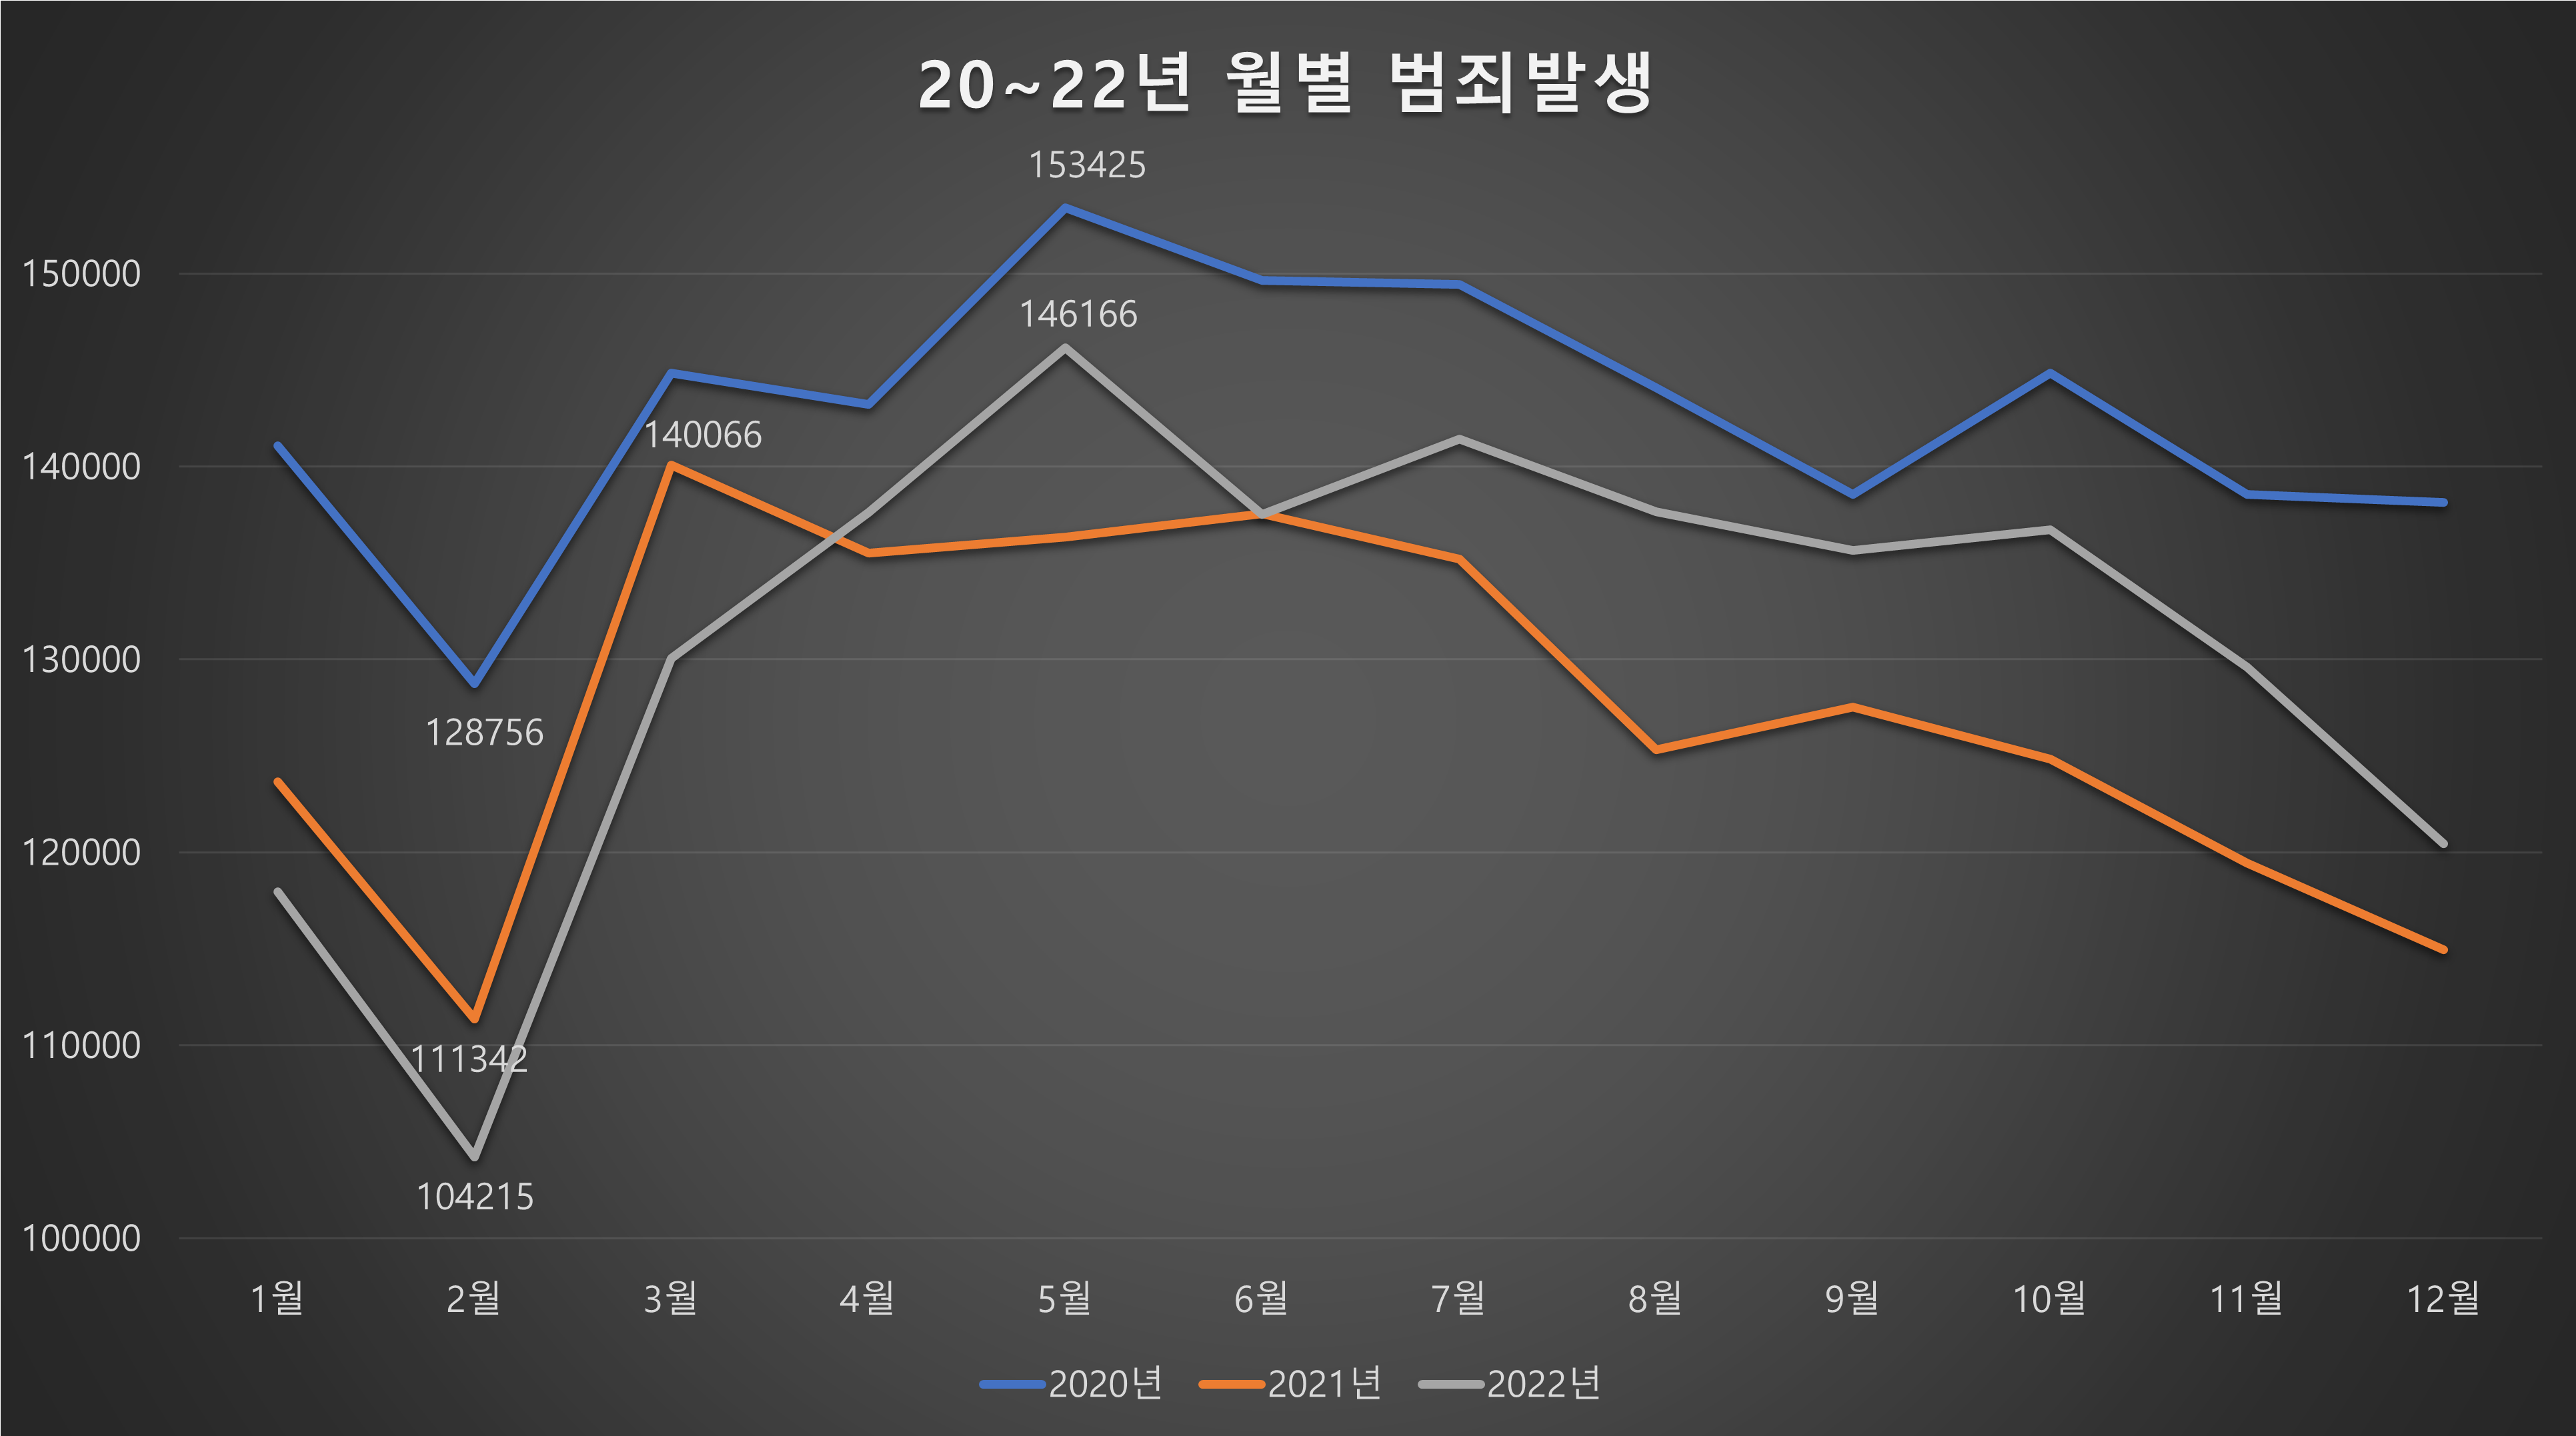

#### 마약 및 실내 관련 특정 추출 (시도)

In [653]:
# y20_crime[y20_crime['범죄 카테고리'].str.contains('마약')] #in y20_crime['범죄 카테고리']]  
# y20_spec = pd.concat([y20_crime[((y20_crime['범죄명']=='소계') & (y20_crime['법률 여부']=='형법범'))],
#                       y20_crime[y20_crime['범죄 카테고리'].str.contains('마약')]
#                       ],axis=0)
# y20_spec

# spec_y20_crime = pd.concat([spec_y20_crime,y20_crime[y20_crime['범죄 카테고리'].str.contains('마약')]], axis=0)
# spec_y20_crime

#### 마약 범죄 3종류 합치기

In [654]:
# 마약 행 3개 합치기 ...
drug20 = y20_crime[y20_crime['범죄 카테고리'].str.contains('마약')]
drug21 = y21_crime[y21_crime['범죄 카테고리'].str.contains('마약')]
drug22 = y22_crime[y22_crime['범죄 카테고리'].str.contains('마약')]

# 이왕 하는거 20~22년도 한번에 작업하자


In [655]:
drug20.set_index('법률 여부') # 인덱스 법률 여부로 변경
drug21.set_index('법률 여부') # 인덱스 법률 여부로 변경
drug22.set_index('법률 여부') # 인덱스 법률 여부로 변경
# drug = pd.DataFrame(drug.iloc[0]+drug.iloc[1]+drug.iloc[2])
# drug
drug20

,법률 여부,범죄 카테고리,범죄명,소계,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
103,특별법범,마약류관리에관한법률(대마),소계,1790,211,193,174,119,130,93,86,104,135,162,198,185
104,특별법범,마약류관리에관한법률(마약),소계,1899,17,17,44,176,1078,429,44,15,17,20,28,14
105,특별법범,마약류관리에관한법률(향정),소계,6916,611,647,767,567,540,533,506,514,510,646,536,539


In [656]:
drug20 = pd.DataFrame(drug20.iloc[0]+drug20.iloc[1]+drug20.iloc[2])
drug20 = drug20.T    #변경 완료 ....
drug20['법률 여부'] = '특별법범'
drug20['범죄 카테고리'] = '마약류 관련 법류'
drug20['범죄명'] = '마약'

drug21 = pd.DataFrame(drug21.iloc[0]+drug21.iloc[1]+drug21.iloc[2])
drug21 = drug21.T    #변경 완료 ....
drug21['법률 여부'] = '특별법범'
drug21['범죄 카테고리'] = '마약류 관련 법류'
drug21['범죄명'] = '마약'

drug22 = pd.DataFrame(drug22.iloc[0]+drug22.iloc[1]+drug22.iloc[2])
drug22 = drug22.T    #변경 완료 ....
drug22['법률 여부'] = '특별법범'
drug22['범죄 카테고리'] = '마약류 관련 법류'
drug22['범죄명'] = '마약'

drug = pd.concat([drug20,drug21,drug22], axis=0)
drug.index = ['2020','2021','2022']
drug.drop(['법률 여부','범죄 카테고리'], axis=1, inplace=True)

drug

,범죄명,소계,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
2020,마약,10605,839,857,985,862,1748,1055,636,633,662,828,762,738
2021,마약,9059,701,913,874,884,1281,903,639,647,539,549,529,600
2022,마약,11822,848,785,942,1161,2034,1315,809,865,824,828,754,657


In [657]:
# spec_y22_crime 별로 top 8 뽑아둠 , 마약 3종류, 주거침입 통합해서 10가지 범죄 다루기.


# Top10_20_crime = pd.concat([spec_y20_crime,y20_crime[y20_crime['범죄 카테고리'].str.contains('마약')]], axis=0)
# Top10_20_crime

#### 사기

In [658]:
fising = pd.concat([spec_y20_crime[spec_y20_crime['범죄명']=='사기'],
                    spec_y21_crime[spec_y21_crime['범죄명']=='사기'],
                    spec_y22_crime[spec_y22_crime['범죄명']=='사기']
                     ],axis=0)
fising


,법률 여부,범죄 카테고리,범죄명,소계,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
6,형법범,재산범죄,사기,354154,28793,28477,34559,31538,31585,30333,29274,27736,26950,27734,28164,29011
6,형법범,재산범죄,사기,297981,29525,22487,28426,24052,23015,23584,23733,22591,22563,23952,26544,27509
6,형법범,재산범죄,사기,329358,27219,24402,29361,28021,28534,27434,28703,29189,25436,27306,26610,27143


#### 폭행

In [659]:
vio = pd.concat([spec_y20_crime[spec_y20_crime['범죄명']=='폭행'],
                    spec_y21_crime[spec_y21_crime['범죄명']=='폭행'],
                    spec_y22_crime[spec_y22_crime['범죄명']=='폭행']
                     ],axis=0)
vio

,법률 여부,범죄 카테고리,범죄명,소계,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
16,형법범,강력범죄(폭력),폭행,143600,11899,11097,12185,12224,13246,12230,12620,12590,11505,12041,10791,11172
16,형법범,강력범죄(폭력),폭행,119515,8783,9115,10587,10381,10684,11091,10557,10074,10534,10128,9688,7893
16,형법범,강력범죄(폭력),폭행,129278,9124,7837,10061,11244,12424,11860,11685,11217,12054,11450,10723,9599


#### 절도

In [660]:
thi = pd.concat([spec_y20_crime[spec_y20_crime['범죄명']=='절도'],
                    spec_y21_crime[spec_y21_crime['범죄명']=='절도'],
                    spec_y22_crime[spec_y22_crime['범죄명']=='절도']
                     ],axis=0)
thi

,법률 여부,범죄 카테고리,범죄명,소계,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
4,형법범,재산범죄,절도,180067,14875,13765,15330,15030,16025,15286,15407,14647,14864,15859,14816,14163
4,형법범,재산범죄,절도,166782,11393,11823,14260,15064,14768,15814,15507,14868,14651,14562,12852,11220
4,형법범,재산범죄,절도,182720,11847,11221,14482,16589,17685,16801,16712,15993,16930,16554,14808,13098


#### 특례법범

In [662]:
spic21 = y21_crime[(y21_crime['범죄명']=='소계') & (y21_crime['법률 여부']=='특별법범')]
spic22 = y22_crime[(y22_crime['범죄명']=='소계') & (y22_crime['법률 여부']=='특별법범')]

spic20 = y20_crime[(y20_crime['범죄명']=='소계') & (y20_crime['법률 여부']=='특별법범')]
spic20

,법률 여부,범죄 카테고리,범죄명,소계,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
59,특별법범,소계,소계,670141,55401,48591,53140,54274,59638,58848,58884,56997,54992,58202,56187,54987
60,특별법범,가정폭력범죄의처벌등에관한특례법,소계,402,41,37,30,37,34,29,28,37,32,30,31,36
61,특별법범,가축분뇨의관리및이용에관한법률,소계,948,83,57,91,52,76,77,99,124,100,81,60,48
62,특별법범,감염병의예방및관리에관한법률,소계,2482,19,61,68,245,278,225,192,449,547,221,105,72
63,특별법범,개발제한구역의지정및관리에관한특별조치법,소계,673,81,31,67,55,64,92,43,35,44,61,60,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,특별법범,화재로인한재해보상과보험가입에관한법률,소계,23,0,0,0,1,2,2,1,8,5,3,1,0
174,특별법범,화재예방·소방시설설치유지및안전관리에관한법률,소계,391,40,28,21,23,27,28,43,35,33,44,38,31
175,특별법범,화재의예방및안전에관한법률/소방시설설치및관리에관한법률,소계,0,0,0,0,0,0,0,0,0,0,0,0,0
176,특별법범,화학물질관리법,소계,702,106,47,65,53,58,63,59,46,37,51,43,74


In [667]:
car21 = spic21[spic21['소계']==(spic21.drop(59))['소계'].max()]
car22 = spic22[spic22['소계']==(spic22.drop(59))['소계'].max()]
car20 = spic20[spic20['소계']==(spic20.drop(59))['소계'].max()]

In [665]:
car = pd.concat([car20,car21,car22])
car

,법률 여부,범죄 카테고리,범죄명,소계,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
79,특별법범,교통사고처리특례법,소계,184990,15123,14099,12772,13898,15644,16473,15729,15221,15521,16850,16884,16776
79,특별법범,교통사고처리특례법,소계,155625,13069,12726,14417,15137,15018,15159,15337,13749,13121,9120,7974,10798
97,특별법범,도로교통법(음주운전),소계,100321,6933,5898,8177,9522,9604,8792,9317,8483,8707,9296,8125,7467


In [668]:
car = pd.concat([spic20[spic20['범죄 카테고리']=='교통사고처리특례법'],spic21[spic21['범죄 카테고리']=='교통사고처리특례법'],spic22[spic22['범죄 카테고리']=='교통사고처리특례법']])
car

,법률 여부,범죄 카테고리,범죄명,소계,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
79,특별법범,교통사고처리특례법,소계,184990,15123,14099,12772,13898,15644,16473,15729,15221,15521,16850,16884,16776
79,특별법범,교통사고처리특례법,소계,155625,13069,12726,14417,15137,15018,15159,15337,13749,13121,9120,7974,10798
79,특별법범,교통사고처리특례법,소계,76210,6212,4922,5347,6264,6825,6162,6421,6332,6728,7277,6867,6853


In [666]:
drink = pd.concat([spic20[spic20['범죄 카테고리']=='도로교통법(음주운전)'],spic21[spic21['범죄 카테고리']=='도로교통법(음주운전)'],spic22[spic22['범죄 카테고리']=='도로교통법(음주운전)']])
drink

,법률 여부,범죄 카테고리,범죄명,소계,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
97,특별법범,도로교통법(음주운전),소계,95569,7806,5180,7006,8154,8341,8339,9124,8438,8728,9040,8191,7222
97,특별법범,도로교통법(음주운전),소계,91055,5692,6301,8294,8178,7935,7951,7736,7249,7968,8734,8298,6719
97,특별법범,도로교통법(음주운전),소계,100321,6933,5898,8177,9522,9604,8792,9317,8483,8707,9296,8125,7467


#### ?

In [661]:
# total_crime
total_crime.drop('법률 여부', axis=1,inplace=True)
total_crime.drop('범죄 카테고리', axis=1,inplace=True)
total_crime.drop('범죄명', axis=1,inplace=True)

total_crime = total_crime.T

corDF = pd.concat([total_covid,total_crime],axis=1)

# corDF

corDF.corr()

# 20년 -> 코로나 확진자 /// 2020년 -> 범죄발생수
# corDF

,20년,21년,22년,2020년,2021년,2022년
20년,1.000000,0.918333,0.140507,-0.317151,-0.463457,-0.298944
21년,0.918333,1.000000,-0.157786,-0.257118,-0.516087,-0.137702
22년,0.140507,-0.157786,1.000000,-0.043206,0.329947,-0.034583
2020년,-0.317151,-0.257118,-0.043206,1.000000,0.999905,0.999849
2021년,-0.463457,-0.516087,0.329947,0.999905,1.000000,0.999828
2022년,-0.298944,-0.137702,-0.034583,0.999849,0.999828,1.000000
